In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning
import pandas as pd

In [2]:
data_path = "data/"
collection = "ONeillsJigs"

# load the dataframe
df = pd.read_pickle(f"{data_path}{collection}_parsed.pkl")
contours = df['TimePitchTune'].values
print(f"Loaded {len(contours)} melodic contours.")

Loaded 365 melodic contours.


In [4]:
# Find the maximum length of the arrays in contours
max_length = max(len(c) for c in contours)

# Pad or truncate each array to the maximum length
contours_padded = np.array([np.pad(c, (0, max_length - len(c)), mode='constant') if len(c) < max_length else c[:max_length] for c in contours])

# Stack the padded arrays
X = np.vstack(contours_padded)
print(f"Data matrix shape: {X.shape}")

Data matrix shape: (365, 5766)


In [5]:
n_components = 20  # Number of dictionary atoms
dict_learner = DictionaryLearning(n_components=n_components, alpha=1.0, max_iter=1000, random_state=0)
X_transformed = dict_learner.fit_transform(X)
dictionary = dict_learner.components_

print(f"Dictionary shape: {dictionary.shape}")
print(f"Transformed data shape: {X_transformed.shape}")

Dictionary shape: (20, 5766)
Transformed data shape: (365, 20)


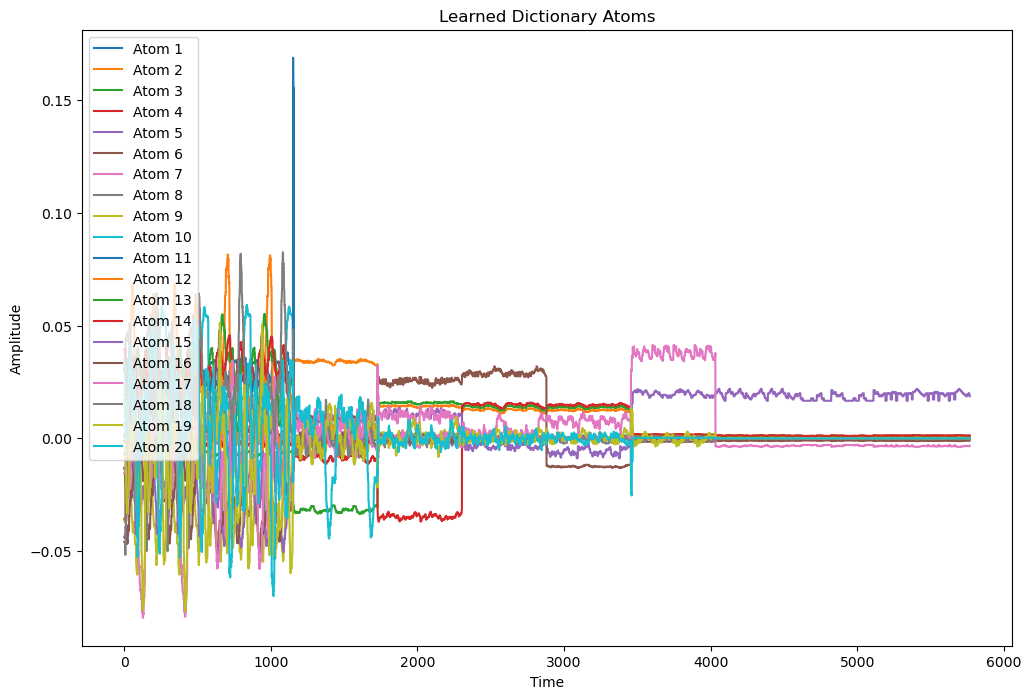

In [6]:
plt.figure(figsize=(12, 8))
for i, atom in enumerate(dictionary):
    plt.plot(atom, label=f'Atom {i+1}')
plt.title('Learned Dictionary Atoms')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [7]:
X_reconstructed = np.dot(X_transformed, dictionary)
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f"Reconstruction MSE: {reconstruction_error:.4f}")

Reconstruction MSE: 1.5225


In [8]:
sparsity = np.mean(np.count_nonzero(X_transformed, axis=1))
print(f"Average number of non-zero coefficients per sample: {sparsity:.2f}")

Average number of non-zero coefficients per sample: 14.38
